# Chapter 11
## Time Series

## 11.1 Date and Time Data Types and Tools

In [1]:
from datetime import datetime
now = datetime.now()

In [2]:
now

datetime.datetime(2018, 2, 4, 11, 11, 5, 250109)

In [3]:
now.year, now.month, now.day

(2018, 2, 4)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [8]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [12]:
stamp.strftime('%F')

'2011-01-03'

In [13]:
stamp.strftime('%D')

'01/03/11'

In [14]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [19]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [137]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [138]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 10:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 10:00:00'], dtype='datetime64[ns]', freq=None)

In [139]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 10:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [140]:
idx[2]

NaT

In [141]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 11.2 Time Series Basics

In [142]:
dates = [datetime(2011, 1, 2),
         datetime(2011, 1, 5),
         datetime(2011, 1, 7),
         datetime(2011, 1, 8),
         datetime(2011, 1, 10),
         datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.605861
2011-01-05   -1.731879
2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
2011-01-12   -0.725468
dtype: float64

In [143]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [144]:
ts + ts[::2] # differently indexed time series automatically aligned on dates

2011-01-02   -1.211723
2011-01-05         NaN
2011-01-07    0.597404
2011-01-08         NaN
2011-01-10   -2.955469
2011-01-12         NaN
dtype: float64

In [145]:
ts.index.dtype # timestamps stored at nanosecond resolution

dtype('<M8[ns]')

In [146]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [147]:
stamp = ts.index[2]
ts[stamp]

0.2987020568304164

In [148]:
ts['1/10/2011']

-1.4777346318129243

In [149]:
ts['20110110']

-1.4777346318129243

In [150]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.038381
2000-01-02    1.472411
2000-01-03    0.070213
2000-01-04    0.231816
2000-01-05    0.896074
2000-01-06   -1.752939
2000-01-07   -0.596341
2000-01-08    1.346100
2000-01-09    0.447387
2000-01-10    0.571886
2000-01-11    0.203558
2000-01-12   -1.369351
2000-01-13    0.596054
2000-01-14   -1.702852
2000-01-15   -0.432506
2000-01-16    0.244481
2000-01-17    0.640760
2000-01-18   -1.263936
2000-01-19   -0.541261
2000-01-20    1.557716
2000-01-21    0.232604
2000-01-22   -1.496776
2000-01-23    2.254794
2000-01-24    0.897646
2000-01-25    0.264401
2000-01-26   -1.827935
2000-01-27   -1.437211
2000-01-28    1.051802
2000-01-29   -0.578788
2000-01-30    0.664382
                ...   
2002-08-28    1.597622
2002-08-29    1.378028
2002-08-30    1.517811
2002-08-31   -0.155725
2002-09-01    1.651598
2002-09-02    0.459787
2002-09-03    0.895891
2002-09-04    1.208310
2002-09-05   -0.435477
2002-09-06   -1.182334
2002-09-07    0.337383
2002-09-08    0.632249
2002-09-09 

In [151]:
longer_ts['2001']

2001-01-01    0.346377
2001-01-02    0.135790
2001-01-03   -0.263616
2001-01-04   -1.009086
2001-01-05   -1.803824
2001-01-06    0.719959
2001-01-07   -0.532346
2001-01-08   -0.131951
2001-01-09    2.280711
2001-01-10   -0.443053
2001-01-11    0.252797
2001-01-12    0.244711
2001-01-13    1.598056
2001-01-14   -1.500054
2001-01-15    0.059024
2001-01-16    0.466102
2001-01-17    1.546788
2001-01-18    0.301864
2001-01-19   -0.374201
2001-01-20   -0.893545
2001-01-21    1.538412
2001-01-22   -0.733666
2001-01-23    0.186988
2001-01-24   -0.181387
2001-01-25   -0.732787
2001-01-26    0.533633
2001-01-27    2.644931
2001-01-28    1.897314
2001-01-29   -1.481079
2001-01-30   -0.467053
                ...   
2001-12-02   -0.102594
2001-12-03   -1.049352
2001-12-04   -0.325793
2001-12-05    0.279894
2001-12-06    0.255260
2001-12-07   -1.649045
2001-12-08    0.236769
2001-12-09   -0.664934
2001-12-10   -0.342112
2001-12-11   -1.542531
2001-12-12    1.104814
2001-12-13   -1.265544
2001-12-14 

In [152]:
longer_ts['2001-05']

2001-05-01    0.723778
2001-05-02    0.642027
2001-05-03   -0.220881
2001-05-04   -0.079065
2001-05-05   -1.267700
2001-05-06    2.668879
2001-05-07    1.035634
2001-05-08   -0.698581
2001-05-09   -0.219934
2001-05-10   -1.068937
2001-05-11    1.446344
2001-05-12    0.542704
2001-05-13   -1.117084
2001-05-14   -1.793460
2001-05-15    2.189073
2001-05-16   -0.001138
2001-05-17   -1.164860
2001-05-18    0.983697
2001-05-19   -0.253503
2001-05-20   -0.306560
2001-05-21    0.600418
2001-05-22   -0.734984
2001-05-23   -0.332735
2001-05-24    1.031277
2001-05-25    1.203446
2001-05-26   -1.074583
2001-05-27    0.969307
2001-05-28   -1.244731
2001-05-29    0.112871
2001-05-30   -0.070270
2001-05-31    1.646688
Freq: D, dtype: float64

In [153]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
2011-01-12   -0.725468
dtype: float64

In [154]:
ts['01/07/2011':]

2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
2011-01-12   -0.725468
dtype: float64

In [155]:
ts

2011-01-02   -0.605861
2011-01-05   -1.731879
2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
2011-01-12   -0.725468
dtype: float64

In [156]:
ts['1/6/2011':'1/11/2011'] # slicing with timestamps not contained in the index for a range query

2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
dtype: float64

In [157]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.605861
2011-01-05   -1.731879
2011-01-07    0.298702
2011-01-08    0.189072
dtype: float64

In [158]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.070139,-1.279596,0.526542,0.107341
2001-05-09,1.426203,-1.077193,1.027703,-0.609869
2001-05-16,-0.549827,-0.851897,0.326005,1.431654
2001-05-23,-1.156240,-0.572900,-0.449105,1.192241
2001-05-30,1.052917,-1.040986,-1.202053,1.310783


### Time Series with Duplicate Indices

In [159]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [160]:
dup_ts.index.is_unique

False

In [161]:
dup_ts['1/3/2000'] # not duplicated

4

In [162]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [163]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [164]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [165]:
ts

2011-01-02   -0.605861
2011-01-05   -1.731879
2011-01-07    0.298702
2011-01-08    0.189072
2011-01-10   -1.477735
2011-01-12   -0.725468
dtype: float64

In [167]:
resampler = ts.resample('D') # resample with daily frequency

### Generating Date Ranges

In [169]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [170]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [171]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [172]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # last business day of each month within range

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [173]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [174]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [175]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [176]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [177]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [178]:
Hour(2) + Minute(30)

<150 * Minutes>

In [179]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [182]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [183]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.762149
2000-02-29    0.346134
2000-03-31   -0.789515
2000-04-30    1.404696
Freq: M, dtype: float64

In [184]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.762149
2000-04-30    0.346134
Freq: M, dtype: float64

In [190]:
ts.shift(-2)

2000-01-31   -0.789515
2000-02-29    1.404696
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [191]:
ts / ts.shift(1) - 1 # percent change

2000-01-31         NaN
2000-02-29   -1.454156
2000-03-31   -3.280950
2000-04-30   -2.779187
Freq: M, dtype: float64

In [192]:
ts.shift(2, freq='M')

2000-03-31   -0.762149
2000-04-30    0.346134
2000-05-31   -0.789515
2000-06-30    1.404696
Freq: M, dtype: float64

In [193]:
ts.shift(3, freq='D')

2000-02-03   -0.762149
2000-03-03    0.346134
2000-04-03   -0.789515
2000-05-03    1.404696
dtype: float64

In [194]:
ts.shift(1, freq='90T') # `T` for minutes (naturally ;) )

2000-01-31 01:30:00   -0.762149
2000-02-29 01:30:00    0.346134
2000-03-31 01:30:00   -0.789515
2000-04-30 01:30:00    1.404696
Freq: M, dtype: float64

#### Shifting dates with offsets

In [195]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [196]:
now + MonthEnd() # first increment with anchored offsets "roll forward" the date to the next date

Timestamp('2011-11-30 00:00:00')

In [197]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [198]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [199]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [200]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.271350
2000-01-19    2.260265
2000-01-23    0.784910
2000-01-27   -0.833541
2000-01-31   -1.327240
2000-02-04    0.332922
2000-02-08    1.342302
2000-02-12    1.237891
2000-02-16    0.820685
2000-02-20    1.208216
2000-02-24    0.390219
2000-02-28    0.578222
2000-03-03   -0.686365
2000-03-07    0.875563
2000-03-11    2.258599
2000-03-15    0.249008
2000-03-19   -0.127950
2000-03-23    0.297606
2000-03-27    0.880680
2000-03-31    0.851323
Freq: 4D, dtype: float64

In [201]:
ts.groupby(offset.rollforward).mean() # apply the `rollforward` function to each Timestamp in the index

2000-01-31    0.122609
2000-02-29    0.844351
2000-03-31    0.574808
dtype: float64

In [209]:
ts.resample('M').mean() # equivalent but faster and easier

2000-01-31    0.122609
2000-02-29    0.844351
2000-03-31    0.574808
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [210]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [212]:
tz = pytz.timezone('America/New_York')
tz # methods in pandas will accept either time zone names or these objects

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time-Zone Localization and Conversion

In [213]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.513158
2012-03-10 09:30:00    0.844333
2012-03-11 09:30:00    1.440958
2012-03-12 09:30:00    0.807088
2012-03-13 09:30:00    0.994130
2012-03-14 09:30:00   -1.851637
Freq: D, dtype: float64

In [214]:
print(ts.index.tz) # by default, date ranges are _time zone naive_

None


In [215]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [216]:
ts

2012-03-09 09:30:00   -0.513158
2012-03-10 09:30:00    0.844333
2012-03-11 09:30:00    1.440958
2012-03-12 09:30:00    0.807088
2012-03-13 09:30:00    0.994130
2012-03-14 09:30:00   -1.851637
Freq: D, dtype: float64

In [217]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.513158
2012-03-10 09:30:00+00:00    0.844333
2012-03-11 09:30:00+00:00    1.440958
2012-03-12 09:30:00+00:00    0.807088
2012-03-13 09:30:00+00:00    0.994130
2012-03-14 09:30:00+00:00   -1.851637
Freq: D, dtype: float64

In [218]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [219]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.513158
2012-03-10 04:30:00-05:00    0.844333
2012-03-11 05:30:00-04:00    1.440958
2012-03-12 05:30:00-04:00    0.807088
2012-03-13 05:30:00-04:00    0.994130
2012-03-14 05:30:00-04:00   -1.851637
Freq: D, dtype: float64

In [223]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.513158
2012-03-10 14:30:00+00:00    0.844333
2012-03-11 13:30:00+00:00    1.440958
2012-03-12 13:30:00+00:00    0.807088
2012-03-13 13:30:00+00:00    0.994130
2012-03-14 13:30:00+00:00   -1.851637
Freq: D, dtype: float64

In [225]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.513158
2012-03-10 15:30:00+01:00    0.844333
2012-03-11 14:30:00+01:00    1.440958
2012-03-12 14:30:00+01:00    0.807088
2012-03-13 14:30:00+01:00    0.994130
2012-03-14 14:30:00+01:00   -1.851637
Freq: D, dtype: float64

In [226]:
ts.index.tz_localize('Asia/Shanghai') # also available on `DatetimeIndex`

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone-Aware Timestamp Objects

In [228]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [229]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [230]:
stamp_utc.value # nanos since Unix epoch

1299902400000000000

In [231]:
stamp_utc.tz_convert('America/New_York').value # doesn't change the internal value

1299902400000000000

In [232]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [233]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [234]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern') # 90 minutes before transitioning out of DST
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [235]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [236]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.895490
2012-03-08 09:30:00    0.347313
2012-03-09 09:30:00    0.210955
2012-03-12 09:30:00    0.223301
2012-03-13 09:30:00    0.335627
2012-03-14 09:30:00   -2.568906
2012-03-15 09:30:00    0.229977
2012-03-16 09:30:00    1.789570
2012-03-19 09:30:00   -0.034502
2012-03-20 09:30:00    1.348807
Freq: B, dtype: float64

In [237]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2 # result will be UTC
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic

In [238]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [239]:
p + 5

Period('2012', 'A-DEC')

In [240]:
p - 2

Period('2005', 'A-DEC')

In [242]:
pd.Period('2014', freq='A-DEC') - p

7

In [243]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [244]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.390984
2000-02    0.495672
2000-03   -0.868738
2000-04    2.044207
2000-05    1.230633
2000-06    0.814255
Freq: M, dtype: float64

In [245]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [246]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [247]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [248]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [249]:
p = pd.Period('2007', freq='A-JUN') # fiscal year ending in June
p

Period('2007', 'A-JUN')

In [250]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [251]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [252]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN') # since subperiod "belongs" in 2007, (June 2007), conversion then falls into the following fiscal year, Aug 2008

Period('2008', 'A-JUN')

In [253]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.355325
2007   -0.077527
2008    0.317745
2009   -1.538212
Freq: A-DEC, dtype: float64

In [254]:
ts.asfreq('M', how='start') # first month of each year

2006-01   -1.355325
2007-01   -0.077527
2008-01    0.317745
2009-01   -1.538212
Freq: M, dtype: float64

In [256]:
ts.asfreq('B', how='end') # last business day of each year

2006-12-29   -1.355325
2007-12-31   -0.077527
2008-12-31    0.317745
2009-12-31   -1.538212
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [257]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [258]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [259]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [260]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [263]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

In [264]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [265]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [269]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.239694
2000-02-29    0.391275
2000-03-31   -0.431898
Freq: M, dtype: float64

In [270]:
pts = ts.to_period()
pts

2000-01   -0.239694
2000-02    0.391275
2000-03   -0.431898
Freq: M, dtype: float64

In [271]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.526085
2000-01-30    0.169098
2000-01-31   -1.105743
2000-02-01   -1.012496
2000-02-02    1.338858
2000-02-03    0.191015
Freq: D, dtype: float64

In [272]:
ts2.to_period('M')

2000-01   -0.526085
2000-01    0.169098
2000-01   -1.105743
2000-02   -1.012496
2000-02    1.338858
2000-02    0.191015
Freq: M, dtype: float64

In [273]:
pts = ts2.to_period()
pts

2000-01-29   -0.526085
2000-01-30    0.169098
2000-01-31   -1.105743
2000-02-01   -1.012496
2000-02-02    1.338858
2000-02-03    0.191015
Freq: D, dtype: float64

In [274]:
pts.to_timestamp(how='end')

2000-01-29   -0.526085
2000-01-30    0.169098
2000-01-31   -1.105743
2000-02-01   -1.012496
2000-02-02    1.338858
2000-02-03    0.191015
Freq: D, dtype: float64

### Creating a `PeriodIndex` from Arrays

In [279]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [282]:
data.year[:10]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
5    1960.0
6    1960.0
7    1960.0
8    1961.0
9    1961.0
Name: year, dtype: float64

In [283]:
data.quarter[:10]

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
5    2.0
6    3.0
7    4.0
8    1.0
9    2.0
Name: quarter, dtype: float64

In [284]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [285]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [286]:
rng = pd.date_range('2000-01-01', periods=100, freq='d')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.878607
2000-01-02   -0.896564
2000-01-03   -0.347070
2000-01-04   -0.932413
2000-01-05    0.636467
2000-01-06    0.065626
2000-01-07   -0.180056
2000-01-08    0.471407
2000-01-09    0.299872
2000-01-10   -1.838408
2000-01-11   -0.359795
2000-01-12    0.461560
2000-01-13   -1.577925
2000-01-14   -0.591312
2000-01-15    0.173013
2000-01-16    0.213235
2000-01-17    0.497073
2000-01-18   -0.729262
2000-01-19   -1.609616
2000-01-20    1.499128
2000-01-21   -0.657451
2000-01-22   -0.388311
2000-01-23    0.494937
2000-01-24    0.215506
2000-01-25    1.593171
2000-01-26   -1.400172
2000-01-27    0.165203
2000-01-28   -1.134114
2000-01-29   -0.725498
2000-01-30   -1.649282
                ...   
2000-03-11    1.290185
2000-03-12    0.059696
2000-03-13   -1.898343
2000-03-14   -1.989112
2000-03-15    0.064130
2000-03-16    0.102375
2000-03-17    1.125299
2000-03-18    0.319874
2000-03-19    0.769391
2000-03-20   -0.422056
2000-03-21   -0.011450
2000-03-22   -0.033222
2000-03-23 

In [287]:
ts.resample('M').mean()

2000-01-31   -0.334816
2000-02-29   -0.220507
2000-03-31    0.108953
2000-04-30    0.048053
Freq: M, dtype: float64

In [288]:
ts.resample('M', kind='period').mean()

2000-01   -0.334816
2000-02   -0.220507
2000-03    0.108953
2000-04    0.048053
Freq: M, dtype: float64

### Downsampling

In [291]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [293]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [294]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [295]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [296]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [297]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [298]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='w-wed'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.476151,0.849263,-0.985528,-0.784322
2000-01-12,0.390284,1.307074,1.147651,-0.358676


In [301]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.476151,0.849263,-0.985528,-0.784322
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.390284,1.307074,1.147651,-0.358676


In [302]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.476151,0.849263,-0.985528,-0.784322
2000-01-06,0.476151,0.849263,-0.985528,-0.784322
2000-01-07,0.476151,0.849263,-0.985528,-0.784322
2000-01-08,0.476151,0.849263,-0.985528,-0.784322
2000-01-09,0.476151,0.849263,-0.985528,-0.784322
2000-01-10,0.476151,0.849263,-0.985528,-0.784322
2000-01-11,0.476151,0.849263,-0.985528,-0.784322
2000-01-12,0.390284,1.307074,1.147651,-0.358676


In [303]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.476151,0.849263,-0.985528,-0.784322
2000-01-06,0.476151,0.849263,-0.985528,-0.784322
2000-01-07,0.476151,0.849263,-0.985528,-0.784322
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.390284,1.307074,1.147651,-0.358676


In [306]:
frame.resample('w-thu').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.476151,0.849263,-0.985528,-0.784322
2000-01-13,0.390284,1.307074,1.147651,-0.358676


### Resampling with Periods

In [307]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.522881,-0.711296,-0.397488,-0.141775
2000-02,0.176482,0.838168,-0.066028,-1.190491
2000-03,-1.232975,0.796557,-0.413210,-0.137764
2000-04,0.980459,0.577857,0.858683,0.469004
2000-05,2.121162,-0.406402,1.148888,0.190959


In [308]:
annual_frame = frame.resample('a-dec').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.426406,0.604114,0.376491,-0.297493
2001,-0.191863,-0.318177,-0.166105,0.372424


In [310]:
annual_frame.resample('q-dec').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.426406,0.604114,0.376491,-0.297493
2000Q2,0.426406,0.604114,0.376491,-0.297493
2000Q3,0.426406,0.604114,0.376491,-0.297493
2000Q4,0.426406,0.604114,0.376491,-0.297493
2001Q1,-0.191863,-0.318177,-0.166105,0.372424
2001Q2,-0.191863,-0.318177,-0.166105,0.372424
2001Q3,-0.191863,-0.318177,-0.166105,0.372424
2001Q4,-0.191863,-0.318177,-0.166105,0.372424


In [311]:
annual_frame.resample('q-dec', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.426406,0.604114,0.376491,-0.297493
2001Q1,0.426406,0.604114,0.376491,-0.297493
2001Q2,0.426406,0.604114,0.376491,-0.297493
2001Q3,0.426406,0.604114,0.376491,-0.297493
2001Q4,-0.191863,-0.318177,-0.166105,0.372424


## 11.7 Moving Window Functions

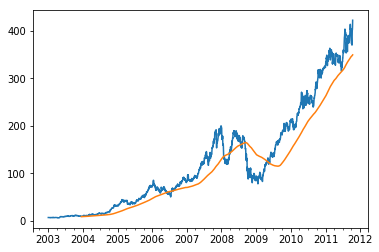

In [314]:
%matplotlib inline

close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [315]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

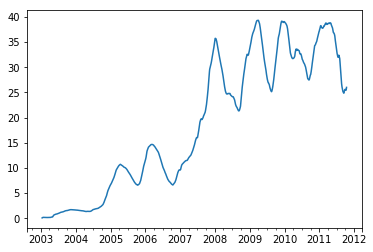

In [316]:
appl_std250.plot()

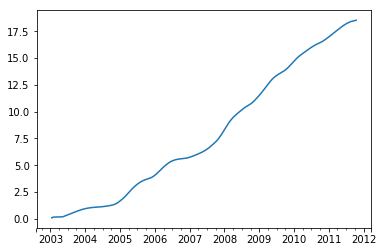

In [318]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot()

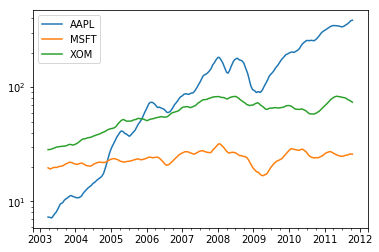

In [319]:
close_px.rolling(60).mean().plot(logy=True) # apply to each column

In [321]:
close_px.rolling('20d').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


### Exponentially Weighted Functions

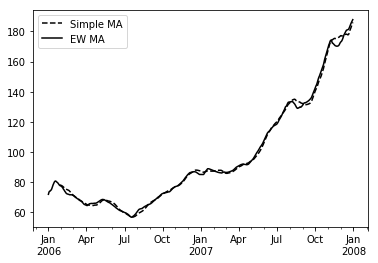

In [331]:
import matplotlib.pyplot as plt

aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

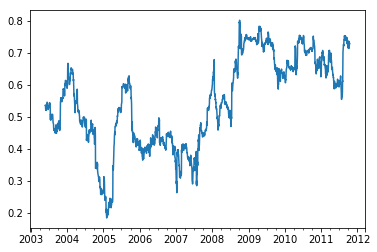

In [332]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets) # rolling correlation
corr.plot()

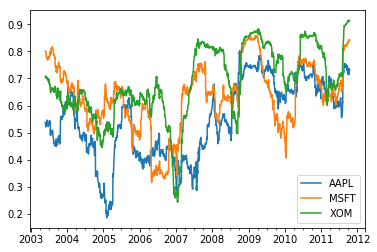

In [333]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

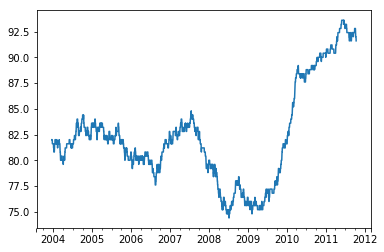

In [335]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()